# 上海历史天气数据分析预测

---

- 报告题目：上海历史天气数据分析预测
- 学员昵称：BellaG
- 课程期数：第一期

© 本文著作权归作者所有，并授权实验楼独家使用，未经实验楼许可，不得转载使用。

---

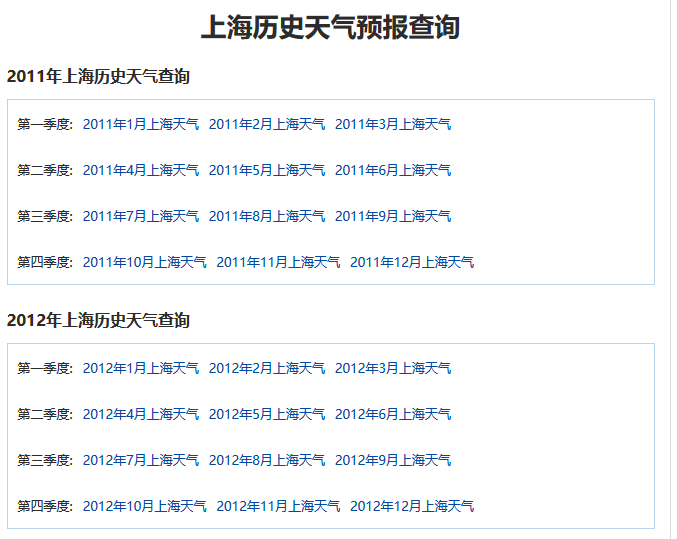</img>

www.tianqihoubao.com/lishi/shanghai.html 统计了上海2011年至今每天的天气状况（如下图）

通过爬取每个月份对应连接下的表格数据，得到2011年至今每天的天气数据。
对此数据进行建模分析，并预测2019年每天天气温度的变化情况。

首先爬取每个月份连接对应的网页，得到每月的数据

In [1]:
import requests
import pandas as pd
import html5lib
import re
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# url=r'http://www.tianqihoubao.com/lishi/shanghai.html'
start_url = r'http://www.tianqihoubao.com/lishi/shanghai/month/{}.html'
t = pd.period_range('2011', '2019', freq='M')
# 生成201101-201812的字符串数据，备用爬取网页不同链接
date_list = []
for i in range(len(t)):
    y = str(t[i]).replace('-', '')
    date_list.append(y)
del date_list[-1]
# 生成一个空表头，方便之后合并表格
df = pd.DataFrame(columns=['日期', '天气状况', '气温', '风力风向'])

In [ ]:
# 爬取2011-2018每个月天气的表格数据
tables = []
for i in tqdm_notebook(range(12)):
    for date in date_list[i*12:(i+1)*12]:
        tables.append(pd.read_html(start_url.format(
            date), header=0, encoding='gbk')[0])
len(tables)

把每月的表格数据合并为一个表，并导出原始数据

In [ ]:
# 合并表格
for i in range(len(tables)):
    df = pd.concat([df, tables[i]], ignore_index=True)
len(df)

In [ ]:
# 先保存下原始数据
df.to_csv('origin_weatherdata.csv')

读取导出的数据

In [3]:
df = pd.read_csv('origin_weatherdata.csv', index_col=0)
print('读取成功')

读取成功


In [4]:
df

,日期,天气状况,气温,风力风向
0,2011年01月01日,晴 /多云,4℃ / 0℃,西北风 4-5级 /北风 4-5级
1,2011年01月02日,多云 /雨夹雪,6℃ / 2℃,北风 4-5级 /北风 4-5级
2,2011年01月03日,多云 /晴,12℃ / 4℃,南风 ≤3级 /南风 ≤3级
3,2011年01月04日,雨夹雪 /雨夹雪,3℃ / -1℃,北风 3-4级 /北风 3-4级
4,2011年01月05日,阴 /多云,6℃ / 0℃,北风 3-4级 /北风 4-5级
5,2011年01月06日,多云 /晴,4℃ / -1℃,北风 4-5级 /北风 4-5级
6,2011年01月07日,多云 /多云,6℃ / 0℃,北风 4-5级 /北风 3-4级
7,2011年01月08日,晴 /多云,7℃ / 1℃,东北风 3-4级 /东北风 3-4级
8,2011年01月09日,阴 /多云,6℃ / 0℃,北风 4-5级 /北风 4-5级
9,2011年01月10日,晴 /多云,3℃ / -1℃,北风 3-4级 /西北风 3-4级


数据清洗、转换，形成带有时间序列的表格

In [5]:
# 整理table，重设列名
df.columns = ['Date', 'Weather', 'Tem', 'Wind']
# 把表格里的日期数据“2011年01月01日”替换为20110101，方便之后转为时间序列
p = "(.*)年(.*)月(.*)日"
new_date = []
for date in df.Date:
    l = re.findall(p, date)[0]
    t = ''
    for i in l:
        t += i
    new_date.append(t)
new_date = np.array(new_date)
m_tem = []
new_date = pd.to_datetime(new_date)
for i in range(len(df)):
    m_tem.append(re.findall(r"(-?[\d]+)", df.Tem[i]))
df_tem = pd.DataFrame(m_tem, index=new_date, columns=['max_tem', 'min_tem'])
len(df_tem)

2905

In [6]:
df_tem = df_tem.dropna().applymap(int)

查看每日最高温度&最低温度随着日期变化图像

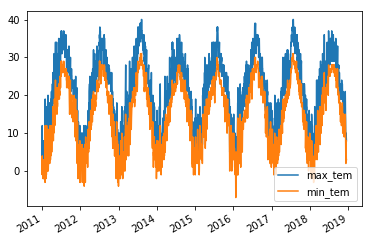

In [7]:
# 根据温度的变化曲线图，可看出df_tem是平稳时间序列
df_tem.plot()

绘制自相关图，观察曲线的变化

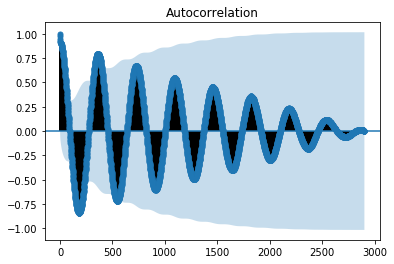

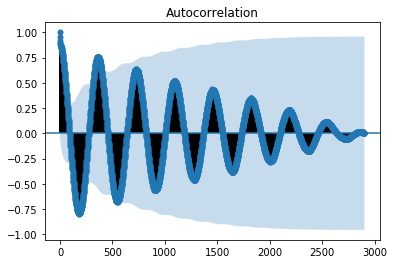

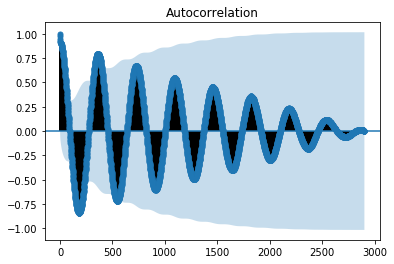

In [8]:
# 绘制最高温度的自相关图
df_max = pd.DataFrame(df_tem.max_tem, index=df_tem.index, columns=['max_tem'])
df_min = pd.DataFrame(df_tem.min_tem, index=df_tem.index, columns=['min_tem'])
plot_acf(df_max)
plot_acf(df_min)

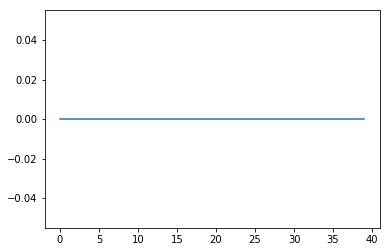

In [9]:
# 纯随机性检验
from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox
LB2, P1 = acorr_ljungbox(df_max)
plt.plot(P1)

用prophet建模预测分析

In [10]:
from fbprophet import Prophet
# 每日最高温度预测
df_max = df_max.reset_index()
df_max.columns = ['ds', 'y']
m = Prophet()  # 创建加法模型
m.fit(df_max)  # 训练
future = m.make_future_dataframe(periods=365, freq='D')  # 生成预测序列
forecast = m.predict(future)  # 预测
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
0,2011-01-01,8.432570,4.409315,12.713564
1,2011-01-02,8.522011,4.304658,12.586076
2,2011-01-03,8.476091,4.257568,12.988784
3,2011-01-04,8.298167,3.798817,12.501508
4,2011-01-05,8.293317,4.006352,12.019662


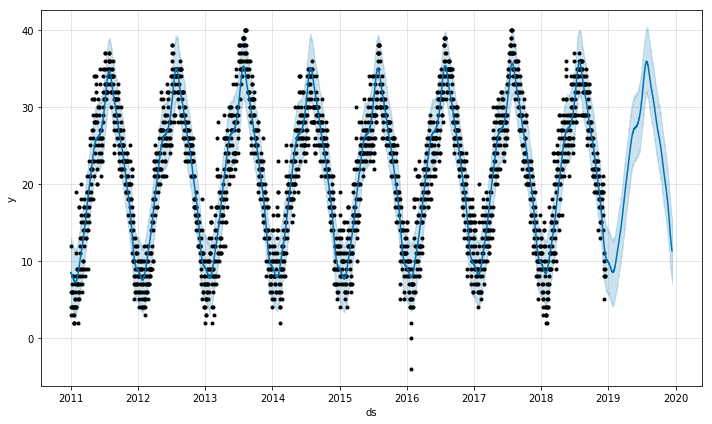

In [11]:
fig = m.plot(forecast)

In [12]:
# 每日最低温度预测
df_min = df_min.reset_index()
df_min.columns = ['ds', 'y']
m2 = Prophet()  # 创建加法模型
m2.fit(df_min)  # 训练
future2 = m2.make_future_dataframe(periods=365, freq='D')  # 生成预测序列
forecast2 = m2.predict(future2)  # 预测
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper
0,2011-01-01,2.719048,-0.719729,6.083691
1,2011-01-02,2.636988,-0.578533,6.077123
2,2011-01-03,2.711140,-0.604218,5.895019
3,2011-01-04,2.614257,-0.485391,5.968238
4,2011-01-05,2.565028,-0.522226,5.965457


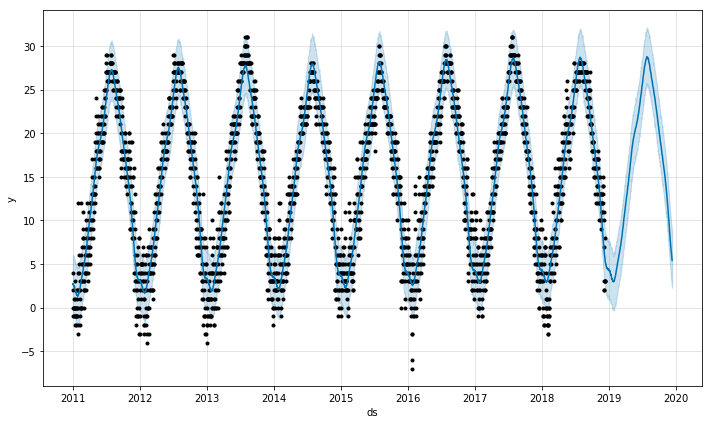

In [13]:
fig = m2.plot(forecast2)

将预测数据合并，生成新的DataFrame并导出

In [14]:
df_final = pd.DataFrame(forecast.yhat.values,
                        index=forecast.ds, columns=['max_Tempe'])
df_final['min_Tempe'] = forecast2.yhat.values
df_final.to_csv('final_data.csv')  # end I tried...

---

#### 评阅意见反馈

<div style="color: #666; font-size: 10px;">
BellaG 提交的《上海历史天气数据分析预测》项目挑战报告基本达到课程挑战要求，内容整体不错。
<br><br>
数据采集部分内容合理，选择了合适的数据源并使用实验相似的方法完成采集。后续可能需要注意缺失值和重复值判断。数据预处理完成的很好，目标明确，需要转换为时间序列数据。使用 fbprophet 完成时序数据建模的步骤正确，加法模型同样可以较为准确地反映温度变化。
<br><br>
虽然围绕选题完成了主线任务，但是整个数据分析报告略显单薄，建议从以下几点进行完善补充：
丰富数据探索内容。原始数据其实包含很多信息，你可以从中统计出气温，温差，风力，气象等不同的特征变化。这其实对于反映一个地区的气候情况是有帮助的。例如，探索：去年今天相同气象；历史最高最低气温月份；风最大的月份等有趣的话题。
整个报告的讨论和分析内容较少，从一幅图、一组数据中得到什么结论，能看出什么？这对于每一个数据分析任务至关重要。
<br><br>
代码方面没有明显的缺点。后期在书写代码时注意按照 PEP8 格式化及添加代码注释，养成良好习惯。VS Code 等 IDE 带有相关格式化插件，Jupyter Notebook 也可以通过安装 jupyter_contrib_nbextensions 拓展开启相关插件自动完成代码格式化。
</div>

<br><br><br>
<div style="color: #666; font-size: 10px; text-align: right;">楼+ 数据分析和挖掘课程组</div>
<div style="color: #666; font-size: 10px; text-align: right;">2018 年 12 月 17 日</div>

---